In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey lung cancer.csv')

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
df.shape

(309, 16)

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

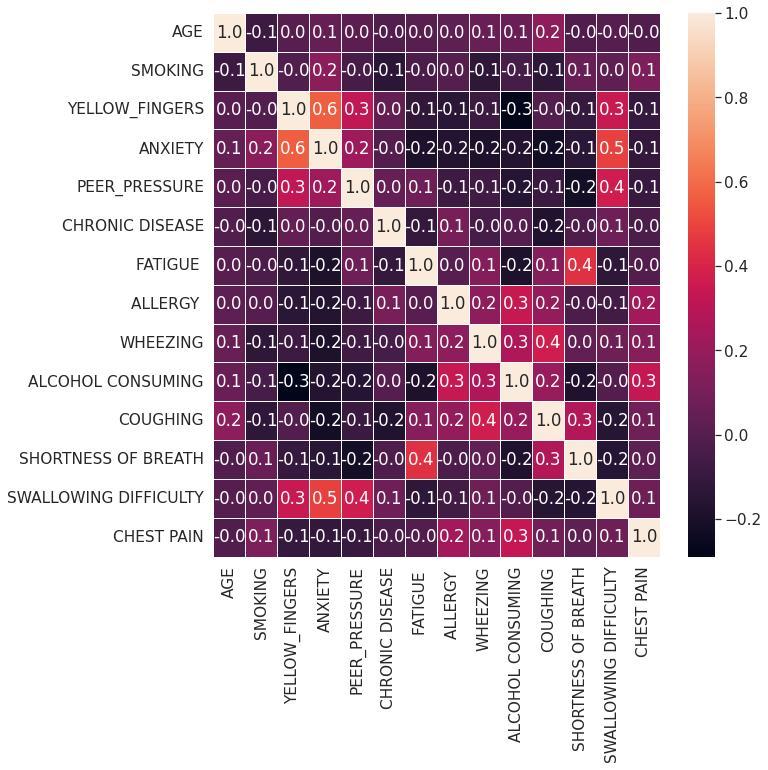

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt=".1f",ax=ax)
plt.show()

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

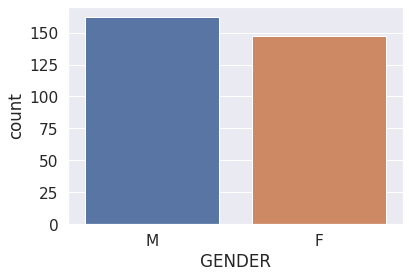

In [ ]:
sns.countplot(data=df,x='GENDER',label='count')

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df['GENDER']=df['GENDER'].apply({'M':0,'F':1}.get)
df['LUNG_CANCER']=df['LUNG_CANCER'].apply({'NO':0,'YES':1}.get)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [ ]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('LUNG_CANCER', axis=1), df['LUNG_CANCER'], test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(309, 15) (247, 15) (62, 15)


In [ ]:
def correlation(df,threshold):
  col_corr=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(X_train,0.1)
len(set(corr_features))

10

In [ ]:
print(corr_features)

{'COUGHING', 'ANXIETY', 'WHEEZING', 'YELLOW_FINGERS', 'SWALLOWING DIFFICULTY', 'CHRONIC DISEASE', 'PEER_PRESSURE', 'ALCOHOL CONSUMING', 'SHORTNESS OF BREATH', 'CHEST PAIN'}


In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [ ]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [ ]:
del_col=[  'GENDER',  'AGE', 'SMOKING',  'ALLERGY ', 'FATIGUE ']
df1=df.drop(del_col,axis=1)
df1.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,2,2,2,2,2,1
1,1,1,1,2,1,1,1,2,2,2,1
2,1,1,2,1,2,1,2,2,1,2,0
3,2,2,1,1,1,2,1,1,2,2,0
4,2,1,1,1,2,1,2,2,1,1,0


In [ ]:
X = df1.drop(columns='LUNG_CANCER',axis=1)
Y = df1['LUNG_CANCER']
print(X)

     YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  WHEEZING  \
0                 2        2              1                1         2   
1                 1        1              1                2         1   
2                 1        1              2                1         2   
3                 2        2              1                1         1   
4                 2        1              1                1         2   
..              ...      ...            ...              ...       ...   
304               1        1              2                2         1   
305               1        1              1                1         2   
306               1        1              1                1         2   
307               1        2              1                1         1   
308               1        1              2                1         2   

     ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  \
0                    2         

In [ ]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('LUNG_CANCER', axis=1), df1['LUNG_CANCER'], test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**KNN**

In [ ]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
test1_data_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", test1_data_accuracy)


Accuracy: 0.8870967741935484


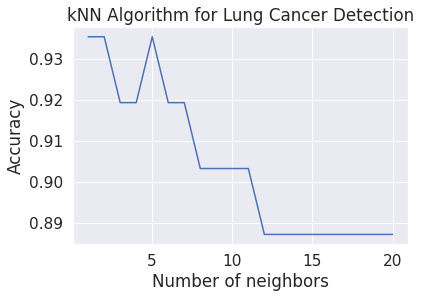

In [ ]:
neighbors = list(range(1, 21))
accuracies = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(neighbors, accuracies)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Algorithm for Lung Cancer Detection")
plt.show()

In [ ]:
r={}
def KNN(df1):
    print('\t\t------------KNN------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    k = 20
    knn = knn = KNeighborsClassifier(n_neighbors=k)
    knn_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        knn.fit(X_train1,Y_train1)
        predict_KNN=knn.predict(X_test1)
        accuracy_KNN=accuracy_score(Y_test1,predict_KNN)
        knn_score.append(accuracy_KNN)
    round_knn_score = [round(knn_num,2) for knn_num in knn_score]
    print('Accuracies of knn :',round_knn_score)
    print('-----------------------------------------------')
    print("accuracy for k-nearest neibhour: "+"{:.2f}".format(np.max(round_knn_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_knn_score)
    c = round(ci,2)
    return c
r['KNN']=KNN(df1)

		------------KNN------------		
Accuracies of knn : [0.74, 0.87, 0.97, 0.94, 0.9, 0.9, 0.87, 0.84, 0.9, 0.93]
-----------------------------------------------
accuracy for k-nearest neibhour: 97.00
-----------------------------------------------


**RF**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [ ]:
test2_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test2_data_accuracy)

Accuracy: 0.9354838709677419


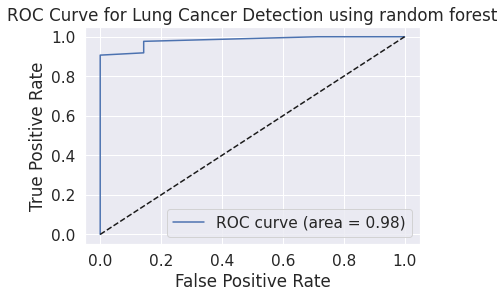

In [ ]:
X = df1.drop(columns='LUNG_CANCER',axis=1)
Y = df1['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)


y_prob = rfc.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Lung Cancer Detection using random forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
r={}
def RFC(df1):
    print('\t\t------------RFC------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    rfc = RandomForestClassifier(n_estimators=85,random_state=1)
    rfc_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        rfc.fit(X_train1,Y_train1)
        predict_RFC=rfc.predict(X_test1)
        accuracy_RFC=accuracy_score(Y_test1,predict_RFC)
        rfc_score.append(accuracy_RFC)
    round_rfc_score = [round(rfc_num,2) for rfc_num in rfc_score]
    print('Accuracies of RF :',round_rfc_score)
    print('-----------------------------------------------')
    print("accuracy for Random Forest : "+"{:.2f}".format(np.max(round_rfc_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_rfc_score)
    c = round(ci,2)
    return c
r['RFC']=RFC(df1)

		------------RFC------------		
Accuracies of RF : [0.84, 0.9, 0.97, 0.87, 0.87, 0.94, 0.87, 0.94, 0.97, 0.97]
-----------------------------------------------
accuracy for Random Forest : 97.00
-----------------------------------------------


**decision** **tree**

In [ ]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [ ]:
test3_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test3_data_accuracy)

Accuracy: 0.946236559139785


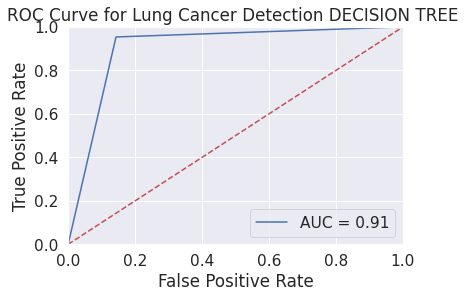

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve for Lung Cancer Detection DECISION TREE ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
r={}
def DT(df1):
    print('\t\t------------DT------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    dt = dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        dt.fit(X_train1,Y_train1)
        predict_DT=dt.predict(X_test1)
        accuracy_DT=accuracy_score(Y_test1,predict_DT)
        dt_score.append(accuracy_DT)
    round_dt_score = [round(dt_num,2) for dt_num in dt_score]
    print('Accuracies of DT :',round_dt_score)
    print('-----------------------------------------------')
    print("accuracy for Decision Tree : "+"{:.2f}".format(np.max(round_dt_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_dt_score)
    c = round(ci,2)
    return c
r['DT']=DT(df1)

		------------DT------------		
Accuracies of DT : [0.84, 0.94, 0.97, 0.87, 0.84, 0.97, 0.9, 0.87, 0.97, 0.9]
-----------------------------------------------
accuracy for Decision Tree : 97.00
-----------------------------------------------


**LR**

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [ ]:
test4_data_accuracy= accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
print("Accuracy:", test4_data_accuracy)
print("Confusion matrix:\n", cm)

Accuracy: 0.956989247311828
Confusion matrix:
 [[ 5  2]
 [ 2 84]]


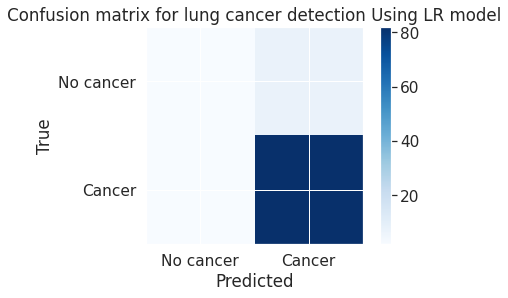

In [ ]:
X = df1.drop(columns='LUNG_CANCER',axis=1)
Y = df1['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('LUNG_CANCER', axis=1), df['LUNG_CANCER'], test_size=0.3)

model = LogisticRegression()


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)


plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix for lung cancer detection Using LR model')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No cancer', 'Cancer'])
plt.yticks(tick_marks, ['No cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
r={}
def LR(df1):
    print('\t\t------------DT------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    lr = LogisticRegression()
    lr_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        lr.fit(X_train1,Y_train1)
        predict_LR=lr.predict(X_test1)
        accuracy_DT=accuracy_score(Y_test1,predict_LR)
        lr_score.append(accuracy_DT)
    round_lr_score = [round(lr_num,2) for lr_num in lr_score]
    print('Accuracies of LR :',round_lr_score)
    print('-----------------------------------------------')
    print("accuracy for Logistic Regression : "+"{:.2f}".format(np.max(round_lr_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_lr_score)
    c = round(ci,2)
    return c
r['LR']=LR(df1)

		------------DT------------		
Accuracies of LR : [0.81, 0.84, 0.97, 0.97, 0.94, 0.87, 0.84, 0.9, 0.94, 0.93]
-----------------------------------------------
accuracy for Logistic Regression : 97.00
-----------------------------------------------


**NB**

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]


In [ ]:
test5_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test5_data_accuracy)

Accuracy: 0.8817204301075269


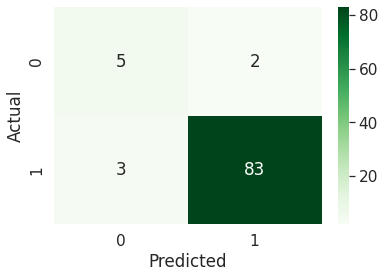

In [ ]:
X = df1.drop(columns='LUNG_CANCER',axis=1)
Y = df1['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


clf = GaussianNB()


clf.fit(X_train, Y_train)


y_pred = clf.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)


sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
r={}
def NB(df1):
    print('\t\t------------DT------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    nb =  GaussianNB()
    nb_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        nb.fit(X_train1,Y_train1)
        predict_NB=nb.predict(X_test1)
        accuracy_NB=accuracy_score(Y_test1,predict_NB)
        nb_score.append(accuracy_NB)
    round_nb_score = [round(nb_num,2) for nb_num in nb_score]
    print('Accuracies of NB :',round_nb_score)
    print('-----------------------------------------------')
    print("accuracy for Naive Bayes: "+"{:.2f}".format(np.max(round_nb_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_nb_score)
    c = round(ci,2)
    return c
r['NB']=NB(df1)

		------------DT------------		
Accuracies of NB : [0.81, 0.81, 0.97, 0.94, 0.94, 0.9, 0.74, 0.84, 0.94, 0.93]
-----------------------------------------------
accuracy for Naive Bayes: 97.00
-----------------------------------------------


**SVM**

In [ ]:
model2=SVC()
model2.fit(X_train,Y_train)

SVC()

In [ ]:
model2.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [ ]:
X_train_prediction = model2.predict(X_train)
training2_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data : ',training2_data_accuracy)

Accuracy on Training data :  0.9166666666666666


In [ ]:
X_test_prediction = model2.predict(X_test)
test6_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data : ',test6_data_accuracy)

Accuracy on Test data :  0.956989247311828


In [ ]:
r={}
def SV(df1):
    print('\t\t------------DT------------\t\t')    
    X1 = df1.iloc[:,:-1].values
    Y1 = df1.iloc[:, -1].values
    cv = KFold(n_splits=10)
    sv = SVC() 
    sv_score = []
    for train_index, test_index in cv.split(X1):
        X_train1, Y_train1 = X1[train_index], Y1[train_index]
        X_test1, Y_test1   = X1[test_index], Y1[test_index]
        sv.fit(X_train1,Y_train1)
        predict_SV=sv.predict(X_test1)
        accuracy_SV=accuracy_score(Y_test1,predict_SV)
        sv_score.append(accuracy_SV)
    round_sv_score = [round(sv_num,2) for sv_num in sv_score]
    print('Accuracies of SVM :',round_sv_score)
    print('-----------------------------------------------')
    print("accuracy for SUPPORT VECTOR MACHINE: "+"{:.2f}".format(np.max(round_sv_score) * 100))
    print('-----------------------------------------------')
    ci = np.max(round_sv_score)
    c = round(ci,2)
    return c
r['SV']=SV(df1)

		------------DT------------		
Accuracies of SVM : [0.81, 0.87, 0.97, 0.94, 0.9, 0.9, 0.84, 0.9, 0.94, 0.93]
-----------------------------------------------
accuracy for SUPPORT VECTOR MACHINE: 97.00
-----------------------------------------------


In [ ]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [ ]:
get_score(LogisticRegression(),X_train,X_test,Y_train,Y_test)

0.978494623655914

In [ ]:
get_score(RandomForestClassifier(max_depth=5),X_train,X_test,Y_train,Y_test)

0.956989247311828

In [ ]:
get_score(SVC(),X_train,X_test,Y_train,Y_test)

0.9247311827956989

In [ ]:
get_score(GradientBoostingClassifier(),X_train,X_test,Y_train,Y_test)

0.956989247311828

In [ ]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))

In [ ]:
data=pickle.load(open('sc.pkl','rb'))
print(data)

StandardScaler()
